# Create a bar chart of latest ICU utilization for every state, including the whole country and Klang Valley (KL+Putrajaya+Selangor)

# importing packages needed to run the scripts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# MoH Covic19 Github data - ICU data by states

In [2]:
# note the total number of rows in the dataframe
url_state_icu = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/icu.csv'
icu_df = pd.read_csv(url_state_icu)
len(icu_df)

10551

In [3]:
icu_df.columns

Index(['date', 'state', 'beds_icu', 'beds_icu_rep', 'beds_icu_total',
       'beds_icu_covid', 'vent', 'vent_port', 'icu_covid', 'icu_pui',
       'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_noncovid', 'vent_used',
       'vent_port_used'],
      dtype='object')

# to find out the latest data's date, to filter out only the final day

In [4]:
last_date = icu_df.iloc[-1]['date']
last_date

'2022-02-05'

In [5]:
# note the number of row in the data frame. 
state_last_date_df = icu_df[icu_df['date']==last_date]
len(state_last_date_df)

16

# the number from CovicNow is total of all ICU, including PUI and NonCovic

In [6]:
# create an empty list
icu_total_patient = []
# calculate the total and add to the list
icu_total_patient = state_last_date_df['icu_covid'] + state_last_date_df['icu_pui'] + state_last_date_df['icu_noncovid']

# add the total into the data frame and create a new DF without unnecessary columns

In [7]:
# add the list into the data frame
state_last_date_df.insert(4, 'icu_total_patient', icu_total_patient, True)

In [8]:
# remove column that is not relevant. 
simplified_state_last_date_df = state_last_date_df[['state', 'icu_total_patient', 'beds_icu_total']]

# need to create additional row for 'Klang Valley'

In [9]:
kv_icu_total_patient = simplified_state_last_date_df[simplified_state_last_date_df['state']=='Selangor'].icu_total_patient.values \
                        + simplified_state_last_date_df[simplified_state_last_date_df['state']=='W.P. Kuala Lumpur'].icu_total_patient.values \
                        + simplified_state_last_date_df[simplified_state_last_date_df['state']=='W.P. Putrajaya'].icu_total_patient.values

In [10]:
kv_beds_icu_total = simplified_state_last_date_df[simplified_state_last_date_df['state']=='Selangor'].beds_icu_total.values \
                        + simplified_state_last_date_df[simplified_state_last_date_df['state']=='W.P. Kuala Lumpur'].beds_icu_total.values \
                        + simplified_state_last_date_df[simplified_state_last_date_df['state']=='W.P. Putrajaya'].beds_icu_total.values

In [11]:
kv_dict = {'state':'Klang Valley',
        'icu_total_patient':kv_icu_total_patient[0],
        'beds_icu_total':kv_beds_icu_total[0]
       }
kv_dict

{'state': 'Klang Valley', 'icu_total_patient': 195, 'beds_icu_total': 306}

# calculate total for the whole country before insert 'Klang Valley' number to not double count

In [12]:
simplified_state_last_date_df.reset_index(drop=True, inplace=True)

In [13]:
my_icu_total_patient = simplified_state_last_date_df.sum(axis=0).icu_total_patient
my_beds_icu_total = simplified_state_last_date_df.sum(axis=0).beds_icu_total

# Add 'Klang Valley' number into the data frame to include into the chart

In [14]:
simplified_state_last_date_df = simplified_state_last_date_df.append(kv_dict, ignore_index = True)

# calculate the ICU utilization for every states, including klang valley

In [15]:
# display all columns
simplified_state_last_date_df.columns

Index(['state', 'icu_total_patient', 'beds_icu_total'], dtype='object')

In [16]:
# calculate the 'icu tilization' number in percentage, one decimal point
simplified_state_last_date_df['icu_utilization'] = \
    round((simplified_state_last_date_df.icu_total_patient/simplified_state_last_date_df.beds_icu_total)*100, 1)

In [17]:
# display all columns to show that new columns was added
simplified_state_last_date_df.columns

Index(['state', 'icu_total_patient', 'beds_icu_total', 'icu_utilization'], dtype='object')

In [18]:
# sort the data frame based on the value of 'icu_utilization' in descending order, before adding Malaysia data. 
simplified_state_last_date_df = simplified_state_last_date_df.sort_values('icu_utilization', ascending=False)

# extract the data from data frame, adding 'Malaysia' data for charting purpose

In [19]:
# read data from data frame into a list, and add Malaysia to the top of the list
state_list = list(simplified_state_last_date_df.state.values)
icu_utilization_list = list(simplified_state_last_date_df.icu_utilization.values)

In [20]:
# read data from data frame into a list, and calculate Malaysia value and add to the top of the list
final_list = ['Malaysia'] + state_list
final_icu_utilization = [round((my_icu_total_patient/my_beds_icu_total)*100,1)] + icu_utilization_list

# draw the bar chart

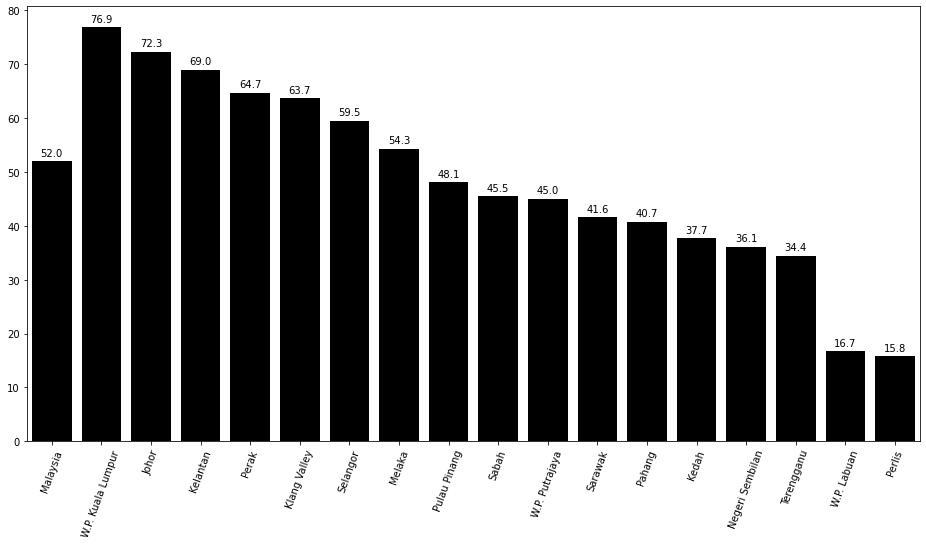

In [21]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=final_list, y=final_icu_utilization, color='Black')
plt.xticks(rotation=70)

for index, value in enumerate(final_list):
    ax.text(index, final_icu_utilization[index]+1, 
            final_icu_utilization[index],
            color='Black', ha='center')